<a href="https://colab.research.google.com/github/IvanGonzal0/Clasificador_Perros_Gatos/blob/main/ImageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from keras import layers, models
import os
import numpy as np
import cv2
import random

In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

# train_dir = os.path.join(PATH, 'train')
# validation_dir = os.path.join(PATH, 'validation')
# test_dir = os.path.join(PATH, 'test')

In [ ]:
# Variables
PATH = '/content/cats_and_dogs/'

width = 300
height = 300
size = (300, 300)

train_dir = '/content/cats_and_dogs/train/'
validation_dir = '/content/cats_and_dogs/validation/'
test_dir = '/content/cats_and_dogs/test/'

In [ ]:
train_x = []
train_y = []

In [ ]:
#listar archivos
for i in os.listdir(train_dir):
    subdirectory_path = os.path.join(train_dir, i)  # Constru la ruta completa del subdirectorio
    if os.path.isdir(subdirectory_path):  # Verifico si es un directorio
        for j in os.listdir(subdirectory_path):
            img_path = os.path.join(subdirectory_path, j)
            img = cv2.imread(img_path)
            img_resized = cv2.resize(img, size)

            train_x.append(img_resized)

            if i == 'cats':
              train_y.append([0,1])
            else:
              train_y.append([1,0])

In [ ]:
#Visual de datos
train_x[1]

array([[[127, 110, 113],
        [141, 124, 127],
        [137, 122, 124],
        ...,
        [230, 228, 228],
        [229, 227, 227],
        [229, 227, 227]],

       [[127, 111, 114],
        [141, 125, 128],
        [137, 123, 125],
        ...,
        [230, 228, 228],
        [229, 227, 227],
        [229, 227, 227]],

       [[121, 109, 111],
        [141, 128, 130],
        [140, 128, 130],
        ...,
        [230, 228, 228],
        [229, 227, 227],
        [229, 227, 227]],

       ...,

       [[107,  99,  95],
        [124, 116, 110],
        [126, 117, 111],
        ...,
        [ 89,  84,  93],
        [ 58,  51,  60],
        [ 77,  70,  80]],

       [[100,  91,  87],
        [121, 113, 106],
        [125, 117, 109],
        ...,
        [ 88,  82,  91],
        [ 75,  67,  77],
        [ 92,  84,  94]],

       [[ 93,  85,  78],
        [115, 107, 100],
        [122, 114, 107],
        ...,
        [ 76,  70,  80],
        [ 61,  53,  63],
        [ 84,  76,  86]]

In [ ]:
# Procesamiento de datos to np.array
x_data = np.array(train_x)
y_data = np.array(train_y)

In [ ]:
#Creacion del modelo

model = tf.keras.Sequential([
    layers.Conv2D(32, 3, 3, input_shape=(300, 300, 3)),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(32, 3, 3),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, 3, 3),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(64),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.Dense(2),
    layers.Activation('sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
epochs = 100

In [ ]:
model.fit(x_data, y_data, epochs = epochs)

Epoch 1/100
63/63 [==============================] - 8s 118ms/step - loss: 2.0785 - accuracy: 0.5120
Epoch 2/100
63/63 [==============================] - 8s 128ms/step - loss: 0.7316 - accuracy: 0.5035
Epoch 3/100
63/63 [==============================] - 8s 127ms/step - loss: 0.7081 - accuracy: 0.5160
Epoch 4/100
63/63 [==============================] - 7s 115ms/step - loss: 0.6987 - accuracy: 0.5205
Epoch 5/100
63/63 [==============================] - 8s 124ms/step - loss: 0.6960 - accuracy: 0.5150
Epoch 6/100
63/63 [==============================] - 8s 124ms/step - loss: 0.6888 - accuracy: 0.5260
Epoch 7/100
63/63 [==============================] - 7s 113ms/step - loss: 0.6798 - accuracy: 0.5590
Epoch 8/100
63/63 [==============================] - 8s 123ms/step - loss: 0.6823 - accuracy: 0.5605
Epoch 9/100
63/63 [==============================] - 8s 119ms/step - loss: 0.6760 - accuracy: 0.5570
Epoch 10/100
63/63 [==============================] - 7s 113ms/step - loss: 0.6617 - accura

In [ ]:
#save model
models.save_model(model, 'ic_model.keras')

In [ ]:
#load model
model  = models.load_model('/content/ic_model.keras')

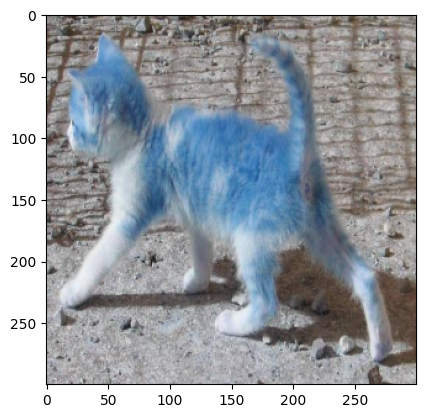

In [ ]:
import matplotlib.pyplot as plt
# test del modelo
img_test = cv2.imread('/content/cats_and_dogs/test/29.jpg')
img_test = cv2.resize(img_test, size)
plt.imshow(img_test)

In [ ]:
result = model.predict(np.array([img_test]))[0]

print(max(result))
if result.argmax()==0:
  print('perro')
else:
  print('gato')

1/1 [==============================] - 0s 17ms/step
0.9878153
gato
